In [120]:
!pip install bayesian-optimization

In [121]:
!pip install optuna


In [122]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [123]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,5,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [125]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [126]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [127]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [128]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [129]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [130]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [131]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [132]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [133]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [134]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [135]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 5 1]


In [136]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [137]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [138]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,5,1,2,1,1,1,1,1,2


In [139]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
7141,1,0,2,1,1,2,2,2,1,1
4933,1,2,1,2,1,1,1,1,1,2
10858,4,2,5,4,2,2,2,2,3,6
3688,4,2,1,2,1,1,1,1,2,2
8143,2,0,2,1,2,2,2,2,2,3
4035,1,5,1,2,1,1,1,1,1,2
421,3,5,2,2,1,1,2,1,1,2
522,4,0,3,2,2,1,2,1,1,2
7156,1,0,2,1,1,2,2,2,1,1
625,1,0,1,2,2,1,1,1,1,2


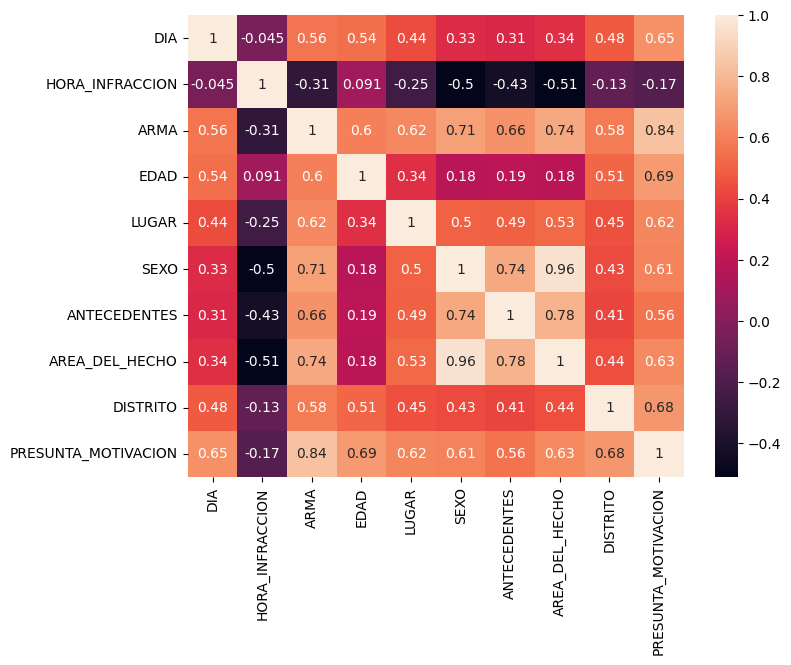

In [140]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [141]:

X = df.iloc[:, [4,8,0,2,3,5,6,9,1]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[7]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,LUGAR,DISTRITO,DIA,ARMA,EDAD,SEXO,ANTECEDENTES,PRESUNTA_MOTIVACION,HORA_INFRACCION
0,1,2,3,1,1,1,1,1,0
1,1,1,3,2,2,1,1,2,2
2,2,1,2,2,2,1,1,2,0
3,1,3,4,1,3,1,1,1,2
4,1,1,3,1,2,1,1,2,5


In [142]:

#presentacion de los atributos de destino
Y.head()

,AREA_DEL_HECHO
0,1
1,1
2,1
3,1
4,1


In [143]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [144]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   LUGAR                9414 non-null   int64
 1   DISTRITO             9414 non-null   int64
 2   DIA                  9414 non-null   int64
 3   ARMA                 9414 non-null   int64
 4   EDAD                 9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   ANTECEDENTES         9414 non-null   int64
 7   PRESUNTA_MOTIVACION  9414 non-null   int64
 8   HORA_INFRACCION      9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from bayes_opt import BayesianOptimization

def evaluate_model(criterion, max_depth, min_samples_split, min_samples_leaf):
    # Opciones para el criterio
    criterion_options = ['gini', 'entropy']
    criterion = criterion_options[int(round(criterion))]

    # Crear y entrenar el modelo
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=int(round(max_depth)),
        min_samples_split=int(round(min_samples_split)),
        min_samples_leaf=int(round(min_samples_leaf)),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Retornar la métrica objetivo (precisión)
    return precision_score(y_test, y_pred, average='micro')

# Definir el espacio de búsqueda
pbounds = {
    'criterion': (0, 1),              # 0 = 'gini', 1 = 'entropy'
    'max_depth': (3, 10),
    'min_samples_split': (2, 11),
    'min_samples_leaf': (1, 25)
}

# Configurar y ejecutar la optimización bayesiana
optimizer = BayesianOptimization(
    f=evaluate_model,
    pbounds=pbounds,
)

# Ejecutar la optimización
optimizer.maximize(init_points=10, n_iter=90)

# Obtener los mejores parámetros encontrados
best_params = optimizer.max['params']

# Convertir el índice del criterio a su nombre
best_criterion_index = int(round(best_params['criterion']))
best_criterion = ['gini', 'entropy'][best_criterion_index]

# Obtener la precisión encontrada
best_precision = optimizer.max['target']

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(f"Criterion: {best_criterion}")
print(f"Max Depth: {int(round(best_params['max_depth']))}")
print(f"Min Samples Split: {int(round(best_params['min_samples_split']))}")
print(f"Min Samples Leaf: {int(round(best_params['min_samples_leaf']))}")
print(f"Precisión alcanzada: {best_precision:.4f}")


|   iter    |  target   | criterion | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------------------
| 1         | 0.9847    | 0.6447    | 5.374     | 9.16      | 9.755     |
| 2         | 0.9847    | 0.1428    | 5.384     | 19.22     | 9.748     |
| 3         | 0.9851    | 0.4474    | 6.119     | 3.864     | 6.857     |
| 4         | 0.9864    | 0.639     | 6.928     | 18.87     | 5.096     |
| 5         | 0.9864    | 0.2804    | 8.435     | 17.01     | 6.03      |
| 6         | 0.9864    | 0.8762    | 5.921     | 10.36     | 8.871     |
| 7         | 0.9813    | 0.1756    | 3.368     | 13.63     | 4.105     |
| 8         | 0.9847    | 0.4519    | 5.218     | 12.84     | 9.839     |
| 9         | 0.9851    | 0.7981    | 5.896     | 4.935     | 7.922     |
| 10        | 0.9864    | 0.8959    | 9.893     | 19.45     | 9.914     |
| 11        | 0.9864    | 0.9052    | 9.253     | 19.25     | 7.296     |
| 12        | 0.986     | 0.9837    | 

In [162]:

#Cargamos la libreria DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


#Llamamos al constructor del arbol de decision
classifier = DecisionTreeClassifier(max_depth=7, min_samples_split=5,min_samples_leaf=19, criterion='entropy')

#Entrenamos el modelo
arbol_modelo = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


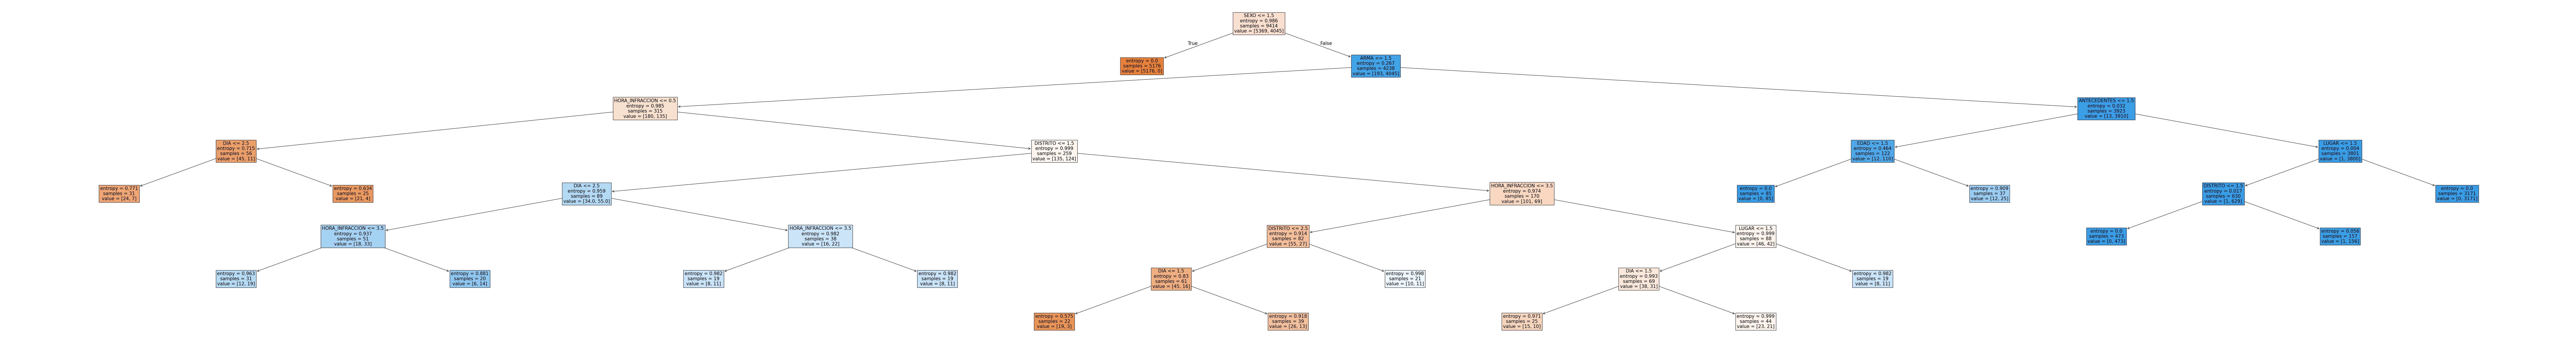

In [163]:


figura_arbol = plt.figure(figsize=(150,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=X.columns,filled=True, fontsize=15)
plt.show()

In [164]:


figura_arbol.savefig("area del hecho_asesinatos.png")

In [165]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_area_hecho_p1.xlsx")

              precision    recall  f1-score      support
1              0.983728  0.992537  0.988113  1340.000000
2              0.990020  0.978304  0.984127  1014.000000
accuracy       0.986406  0.986406  0.986406     0.986406
macro avg      0.986874  0.985421  0.986120  2354.000000
weighted avg   0.986438  0.986406  0.986396  2354.000000


In [166]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             1   0.983728
1             2   0.990020
2     macro avg   0.986874
3  weighted avg   0.986438


In [167]:

y_test.head()

,AREA_DEL_HECHO
0,1
1,2
2,1
3,1
4,1


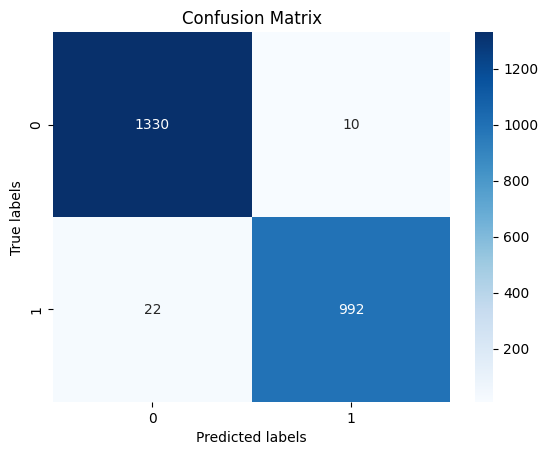

In [168]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [169]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_area_hecho.xlsx")

      0    1
0  1330   10
1    22  992


In [170]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['area_hecho_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


,area_hecho_prediccion,AREA_DEL_HECHO
0,1,1
1,2,2
2,1,1
3,1,1
4,1,1
5,2,2
6,2,2
7,1,1
8,2,2
9,1,1


In [171]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada(arbol_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)



In [172]:

#Validación cruzada
v_cruzada(arbol_modelo, X_train,y_train)

Iteraciones validación cruzada (Precisión):
 [0.98884758 0.98406798 0.98406798 0.98619225 0.98459086]
Precisión media:
 0.985553 (0.001822)
Iteraciones validación cruzada (Accuracy):
 [0.98884758 0.98406798 0.98406798 0.98619225 0.98459086]
Accuracy media:
 0.985553 (0.001822)
Iteraciones validación cruzada (Recall):
 [0.98884758 0.98406798 0.98406798 0.98619225 0.98459086]
Recall media:
 0.985553 (0.001822)


In [173]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  98.64061172472387
Accuracy:  98.64061172472387
Recall:  98.64061172472387


In [174]:
df_combined['AREA_DEL_HECHO'] = df_combined['AREA_DEL_HECHO'].apply(lambda x:
                                                                                                    'Urbano' if x == 1 else
                                                                                                    'Rural')



In [175]:
df_combined['area_hecho_prediccion'] = df_combined['area_hecho_prediccion'].apply(lambda x:
                                                                                                    'Urbano' if x == 1 else
                                                                                                    'Rural')



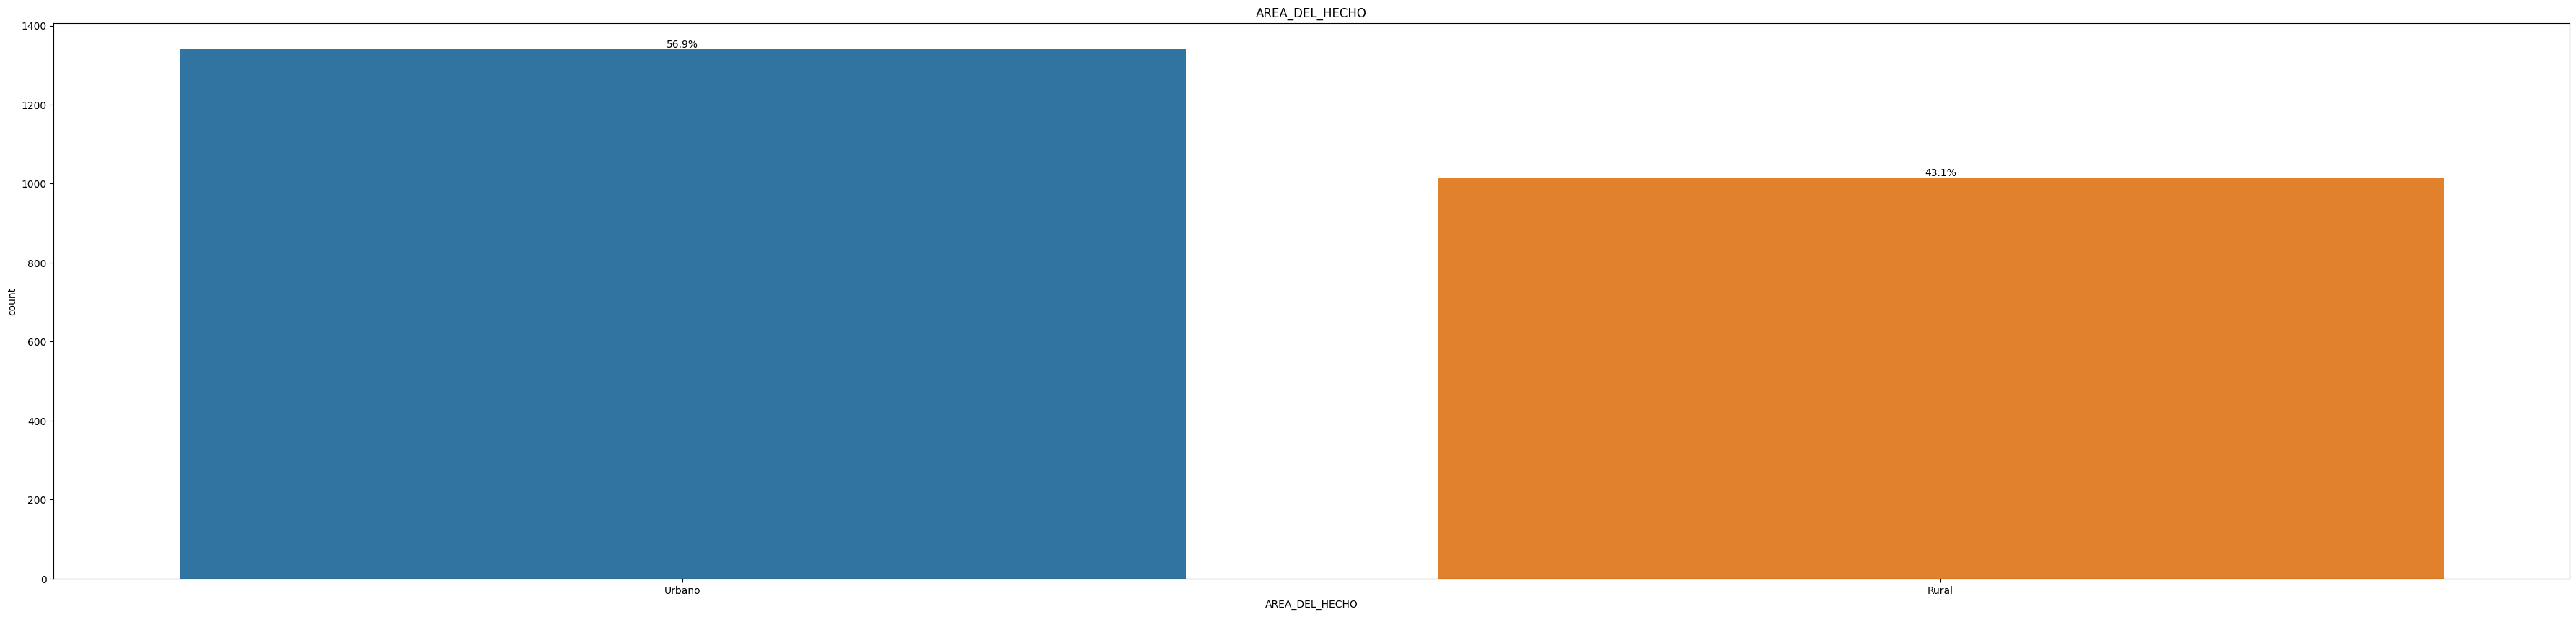

In [176]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='AREA_DEL_HECHO',hue = 'AREA_DEL_HECHO', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('AREA_DEL_HECHO')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_AREA_DEL_HECHO.png")

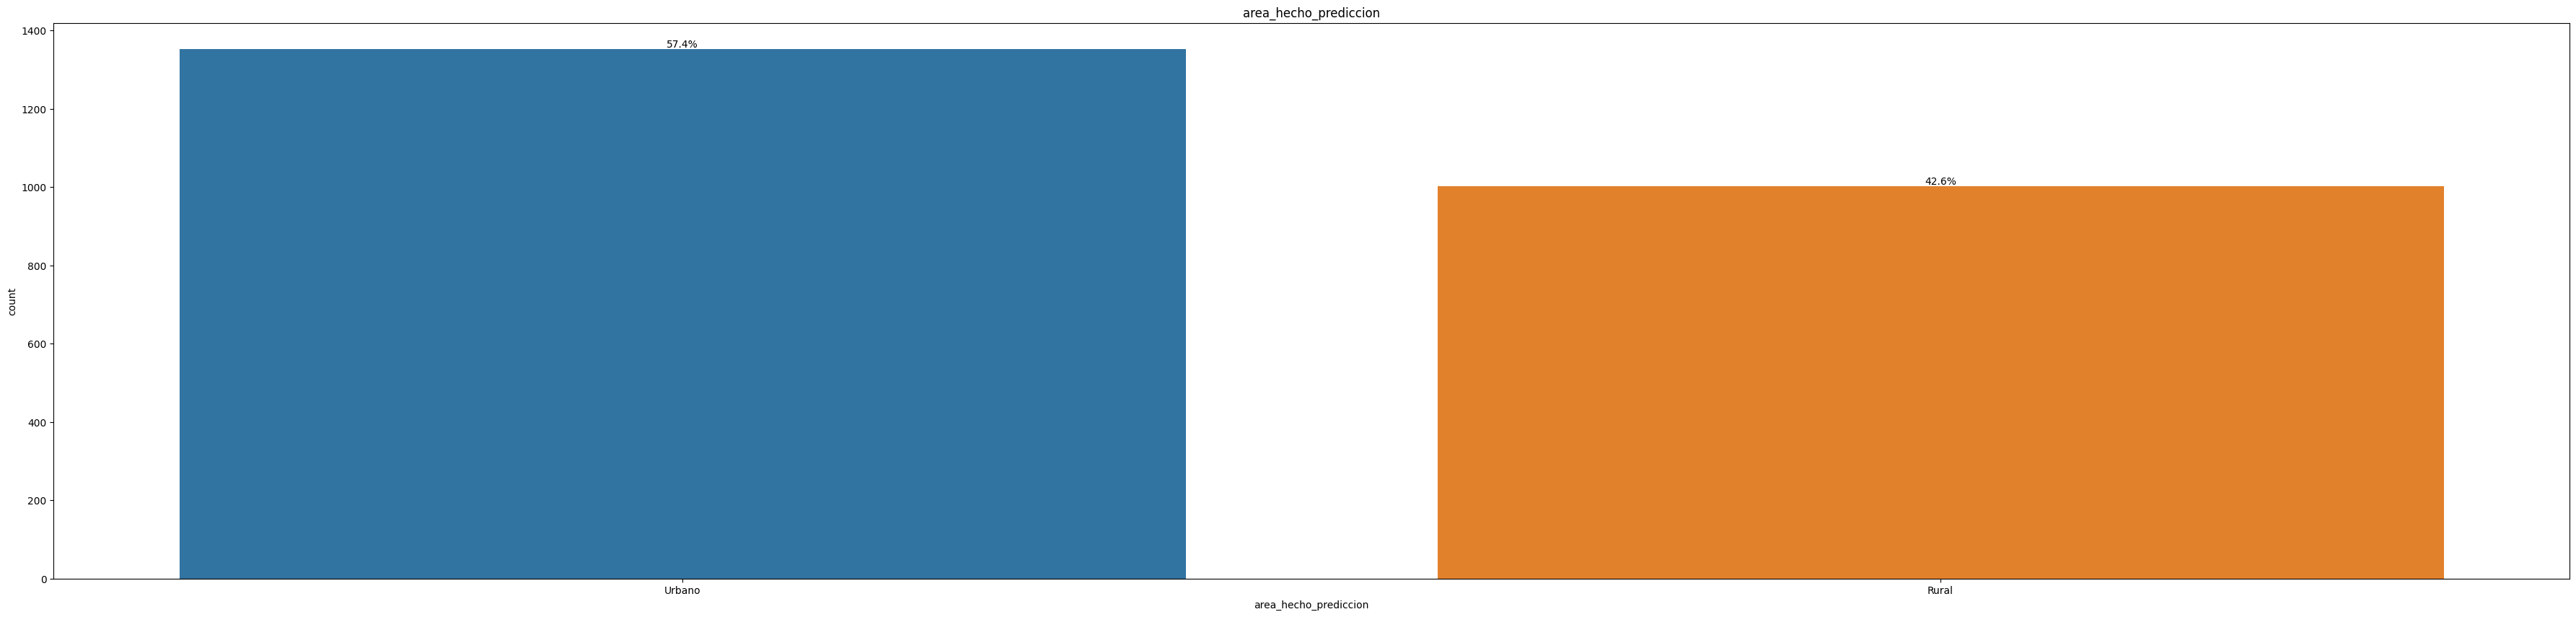

In [177]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='area_hecho_prediccion',hue = 'area_hecho_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('area_hecho_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_area_hecho.png")